# Introduction

The main function of this module is to convert recored peak intensities to particle sizes and create a [sizedistribution instance](./sizedistribution.ipynb).

# Imports

In [1]:
from atmPy.instruments.POPS import peaks,calibration
%matplotlib inline
hm.setRcParams(plt)

In [5]:
from importlib import reload

In [93]:
reload(peaks)

<module 'atmPy.instruments.POPS.peaks' from '/Users/htelg/prog/atm-py/atmPy/instruments/POPS/peaks.py'>

# Reading a Peak file

Different file formats emerged during the development of POPS, which resulted in different functions with various optional parameters to read the files. Hopefully you will only need to use the following one which emerged in fall 2015.

In [94]:
filename = '/Users/htelg/prog/atm-py/examples/data/POPS_Peak.bin'
measurement = peaks.read_binary(filename)

# Sizing

To convert peak heights to particle sizes we first have to load a calibration file. Further information on calibration can be found [here](./instruments_POPS_calibration.ipynb).

In [95]:
cal = calibration.read_csv('./data/POPS_calibration.csv')

Then we apply this calibration which adds an extra column to the data set containg the particle size.

In [96]:
measurement.apply_calibration()

	 23637 from 67386 peaks (35 %) are outside the calibration range (amplitude = [47.5335225943, 28840.3150313], diameter = [120, 3000])
		 23635 too small
		 2 too big


# Convert to size distribution 

Either use use the default bins or define your own.

In [101]:
bins = np.logspace(np.log10(120), np.log10(3000), 100)
sd = measurement.peak2sizedistribution(bins = bins)

Done! Now you can do what ever you can do with a sizedistribution instance ([see here](./sizedistribution.ipynb)). E.g. save it, or plot it

In [102]:
sd.save_csv('./data/POPS_Peak.bin.dist')

(<matplotlib.figure.Figure at 0x10ffff198>,
 <matplotlib.colorbar.Colorbar at 0x16a2baf98>)

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/figure.py:1718: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


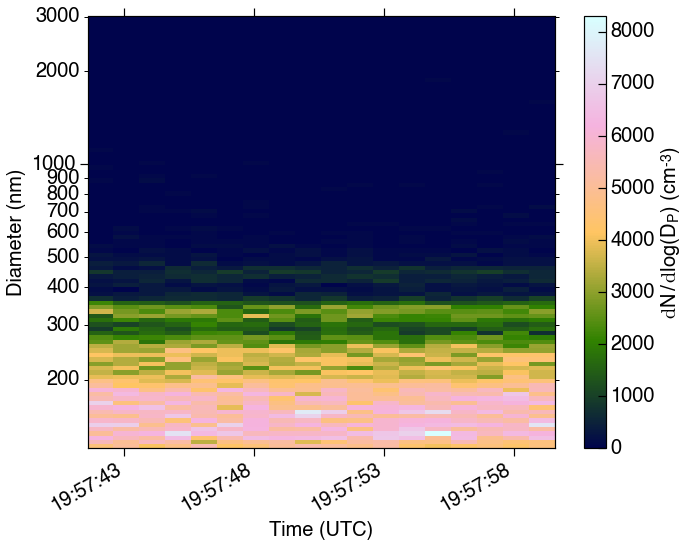

In [103]:
sd.plot()